In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
DATA_PATH=f"data/train.csv"
df=pd.read_csv(DATA_PATH)
print(df.shape)
df.head()

(16209, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [2]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df=df.drop(columns=["id"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16209 non-null  object 
 1   price          16209 non-null  int64  
 2   bedrooms       16209 non-null  int64  
 3   bathrooms      16209 non-null  float64
 4   sqft_living    16209 non-null  int64  
 5   sqft_lot       16209 non-null  int64  
 6   floors         16209 non-null  float64
 7   waterfront     16209 non-null  int64  
 8   view           16209 non-null  int64  
 9   condition      16209 non-null  int64  
 10  grade          16209 non-null  int64  
 11  sqft_above     16209 non-null  int64  
 12  sqft_basement  16209 non-null  int64  
 13  yr_built       16209 non-null  int64  
 14  yr_renovated   16209 non-null  int64  
 15  zipcode        16209 non-null  int64  
 16  lat            16209 non-null  float64
 17  long           16209 non-null  float64
 18  sqft_l

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Since in Years column all are in between 2014-2015 so,we can drop it because there will be no inflation sort of impacts..

In [7]:
df=df.drop(columns=["date"])

<Axes: xlabel='price', ylabel='Count'>

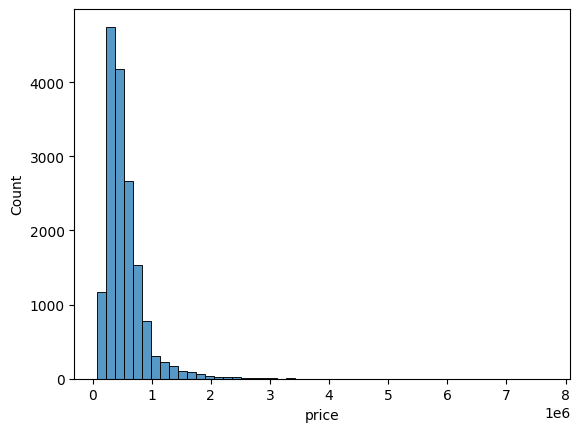

In [8]:
sns.histplot(df["price"],bins=50)


from above graph we can say it is highly right-skewed


In [9]:
# lets change price to log(price)
df["price"]=np.log1p(df["price"])

In [10]:
df["waterfront"].value_counts(normalize=True)

waterfront
0    0.993029
1    0.006971
Name: proportion, dtype: float64

In [11]:
# since sqft_living=sqft_above +sqft_basement
df=df.drop(columns=["sqft_above","sqft_basement"])

In [12]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=["zipcode"])
df["zipcode"] = encoder.fit_transform(df["zipcode"], df["price"])


In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
scalecols=[
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[scalecols]=scaler.fit_transform(df[scalecols])

In [16]:
df.shape

(16209, 17)

In [17]:
df.to_csv("cleaned_tabular.csv",index=False)

In [18]:
dff=pd.read_csv("cleaned_tabular.csv")

In [19]:
dff

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.501142,0.677402,0.178963,-0.290276,-0.144952,0.922943,0,-0.306964,-0.626000,-0.557611,-0.345663,-0.207964,12.581985,-0.900034,0.192759,-0.473911,-0.129791
1,12.409018,-0.394132,0.505667,-0.521813,-0.311135,0.922943,0,-0.306964,0.908842,-0.557611,0.709771,-0.207964,12.591252,-1.137139,0.192759,-0.385919,-0.339019
2,12.206078,0.677402,0.505667,-0.389506,-0.160457,0.922943,0,-0.306964,-0.626000,0.296350,0.777864,-0.207964,12.531108,-2.098571,-0.706669,-0.165941,-0.196068
3,12.772806,-1.465666,0.178963,-0.918734,-0.364787,0.922943,0,-0.306964,-0.626000,-0.557611,1.288558,-0.207964,13.257362,-0.206791,1.006527,-1.089851,-0.445025
4,12.354497,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,0,-0.306964,-0.626000,-0.557611,0.777864,-0.207964,12.605452,-1.367738,0.999388,-0.576568,-0.173196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,12.842652,-0.394132,-0.801150,-1.183348,-0.204862,-0.918626,0,-0.306964,-0.626000,-0.557611,-0.822311,-0.207964,12.987940,1.111021,-0.749499,-1.441817,-0.214930
16205,12.899097,-0.394132,0.505667,1.117691,-0.254109,0.922943,0,-0.306964,-0.626000,0.296350,1.458789,-0.207964,12.523093,-1.903393,-0.963648,1.384176,-0.280428
16206,13.262127,-0.394132,0.505667,0.051517,-0.259827,0.922943,0,-0.306964,-0.626000,-0.557611,1.118326,-0.207964,13.330295,0.869579,1.299198,-0.429915,-0.374478
16207,12.409018,-2.537201,-1.781262,-1.866934,0.003408,-0.918626,0,-0.306964,-0.626000,-2.265534,-0.277571,-0.207964,12.356950,-0.576183,-0.778052,-1.192508,0.084078
